In [102]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [103]:
df = pd.read_csv('./라벨링완료된공지사항(수정본).csv')
df.head()

,Cid,title,hits,time,cluster,class
0,5,2019 국립중앙대(대만) 썸머스쿨 참가자 선발 안내,6077,2019-03-08,499,국제교류
1,5,2019 봉갑대(대만) 썸머스쿨 참가자 선발,5374,2019-03-26,499,국제교류
2,5,2019 실천대(대만) 썸머스쿨 참가자 선발,4810,2019-05-22,499,국제교류
3,5,2019 중국 동북사범대 썸머스쿨 참가자 선발,821,2019-05-14,499,국제교류
4,5,2019 중국 동북사범대 썸머스쿨 참가자 선발(2차),4768,2019-05-21,499,국제교류


In [104]:
# year, month column 추가
df['year'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df['month'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

df.head()

,Cid,title,hits,time,cluster,class,year,month
0,5,2019 국립중앙대(대만) 썸머스쿨 참가자 선발 안내,6077,2019-03-08,499,국제교류,2019,3
1,5,2019 봉갑대(대만) 썸머스쿨 참가자 선발,5374,2019-03-26,499,국제교류,2019,3
2,5,2019 실천대(대만) 썸머스쿨 참가자 선발,4810,2019-05-22,499,국제교류,2019,5
3,5,2019 중국 동북사범대 썸머스쿨 참가자 선발,821,2019-05-14,499,국제교류,2019,5
4,5,2019 중국 동북사범대 썸머스쿨 참가자 선발(2차),4768,2019-05-21,499,국제교류,2019,5


In [105]:
#df_Cid_1~10 생성
for i in range(1,11):
    globals()['df_Cid_{}'.format(i)] = df[df['Cid']==i]

df_Cid_1.head()


,Cid,title,hits,time,cluster,class,year,month
23,1,2020 산학협력 EXPO Dream PATH+ 마일리지 연계 프로그램,1893,2020-12-08,497,프로그램,2020,12
24,1,Dream PATH 비교과프로그램 이렇게 신청하세요,835,2021-10-22,497,프로그램,2021,10
26,1,2021학년도 Dream PATH 마일리지 경진대회 발표 및 시상안내,1448,2021-12-20,497,대회,2021,12
27,1,Dream PATH+새 이름 공모합니다.,2127,2020-10-31,497,공모전,2020,10
28,1,2021년 Dream PATH마일리지 장학 신청안내,1407,2021-10-25,497,기타장학,2021,10


In [106]:
#df_Cid_1~10_2019~2022 생성
for i in range(1,11):
    globals()['df_Cid_{}_2019'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2019]
    globals()['df_Cid_{}_2020'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2020]
    globals()['df_Cid_{}_2021'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2021]
    globals()['df_Cid_{}_2022'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2022]



In [107]:
def plot_monthly_hits(df, cid):
    df_monthly = df.groupby(['month', 'class'])['hits'].sum().reset_index()
    df_top_classes = df_monthly.groupby('month').apply(lambda x: x.nlargest(3, 'hits')).reset_index(drop=True)

    classes = df_top_classes['class'].unique()
    num_classes = len(classes)
    colors = plt.cm.tab20(np.linspace(0, 1, num_classes))

    monthly_data = []
    for month in range(1, 13):
        df_month = df_top_classes[df_top_classes['month'] == month]
        monthly_hits = {cls: 0 for cls in classes}
        for cls in classes:
            if cls in df_month['class'].values:
                monthly_hits[cls] = df_month.loc[df_month['class'] == cls, 'hits'].values[0]
        monthly_data.append(monthly_hits)

    fig, ax = plt.subplots(figsize=(12, 8))
    df_monthly_top_classes = pd.DataFrame(monthly_data, index=range(1, 13))
    df_monthly_top_classes.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_xlabel('Month')
    ax.set_ylabel('Hits')
    ax.set_title(f'Monthly Hits of Top 3 Classes for Cid={cid}')
    ax.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


In [108]:
def plot_monthly_top_classes(df, cid, nor=1, num_classes=3, figsize=(15, 20)):
    # Filter dataframe by cid
    df_cid = df[df['Cid'] == cid]

    # Create subplots
    fig, axs = plt.subplots(4, 3, figsize=figsize)  # 4 rows of 3 plots each

    plt.suptitle(f'Cid_{cid} Monthly Top {num_classes} Classes Hits', fontsize=16, y=1.02)

    # Month labels
    months = [
        "January", "February", "March",
        "April", "May", "June",
        "July", "August", "September",
        "October", "November", "December"
    ]

    # Calculate the maximum y value across all subplots
    max_y_value = df_cid.groupby(['class'])['hits'].sum().nlargest(num_classes).max() / nor

    # Loop over each subplot and populate with data for that month
    for i, ax in enumerate(axs.flatten()):
        # Create monthly dataframe
        df_monthly = df_cid[df_cid['month'] == i + 1]
        df_monthly_top_classes = df_monthly.groupby('class')['hits'].sum().nlargest(num_classes)

        # Create the bar chart
        if df_monthly_top_classes.empty:
            df_monthly_top_classes = pd.Series([0] * num_classes, index=range(1, num_classes + 1))

        df_monthly_top_classes.plot(kind='bar', ax=ax)

        # Set title and labels
        ax.set_title(months[i])
        ax.set_xlabel('Class')
        ax.set_ylabel('Hits')

        # Set the same y axis limit for all subplots
        ax.set_ylim(0, max_y_value)

        # Rotate x labels
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

        # Write class numbers on top of the bars
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()


In [109]:
def plot_monthly_posts(df, cid):
    # 월별 게시글 수 계산
    monthly_counts = df['month'].value_counts().sort_index()

    # 결과를 막대 그래프로 표시
    fig, ax = plt.subplots(figsize=(6,6))

    monthly_counts.plot(kind='bar', ax=ax)

    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Posts')
    ax.set_title(f'Monthly Number of Posts in Cid_{cid}')

    plt.tight_layout()
    plt.show()


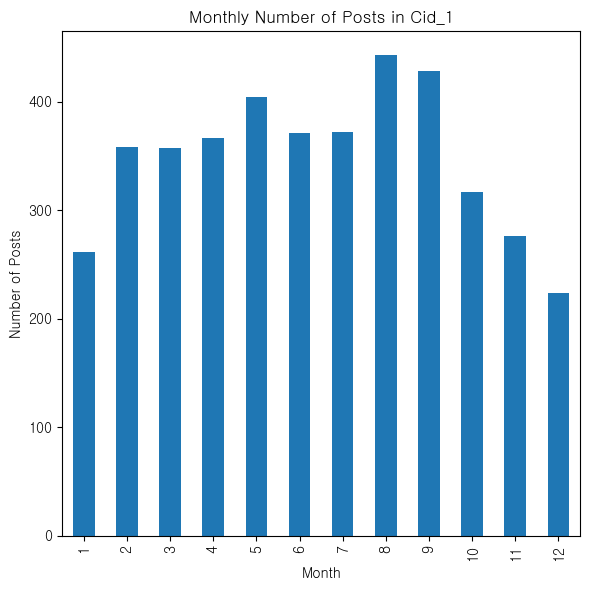

In [110]:
plot_monthly_posts(df_Cid_1, 1)


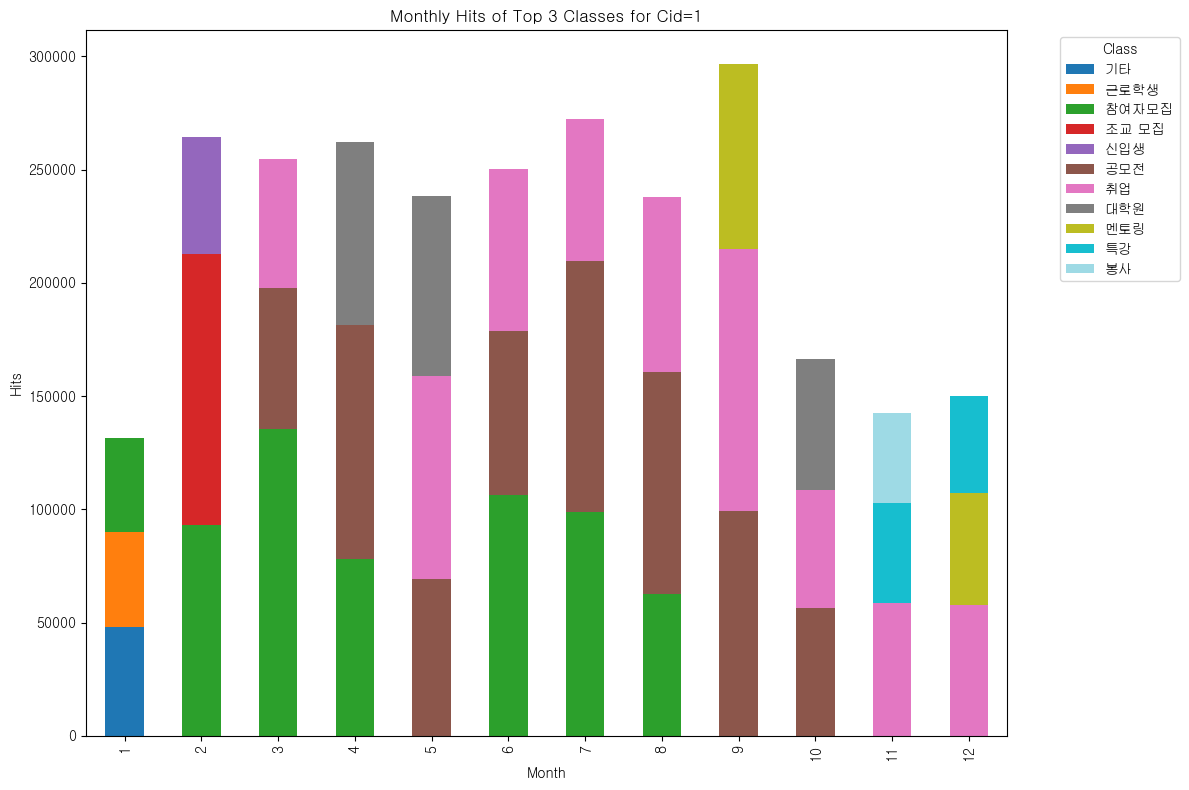

In [111]:
plot_monthly_hits(df_Cid_1, 1)


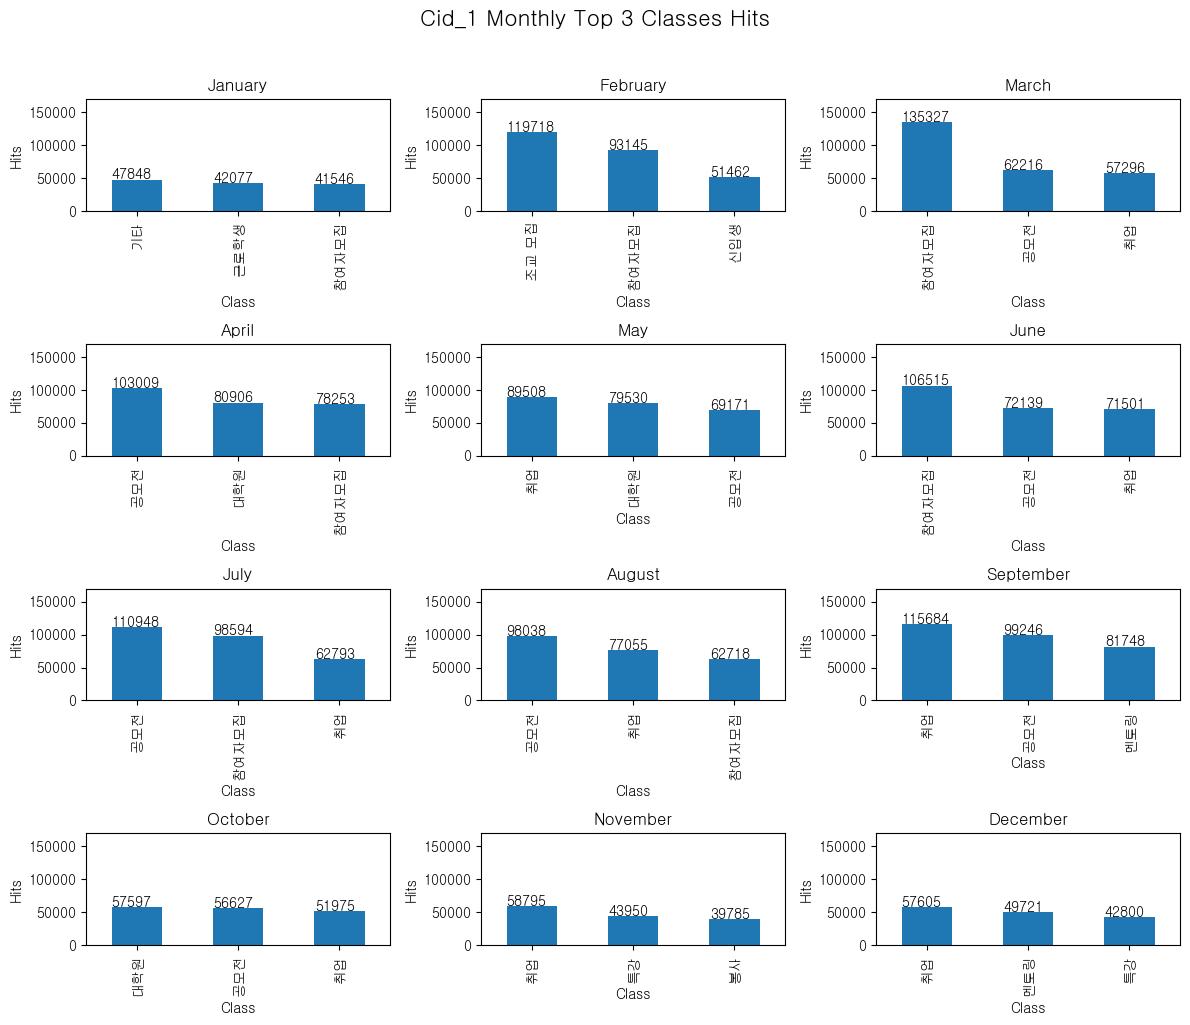

In [112]:
plot_monthly_top_classes(df, cid=1, nor=5,num_classes=3, figsize=(12, 10))


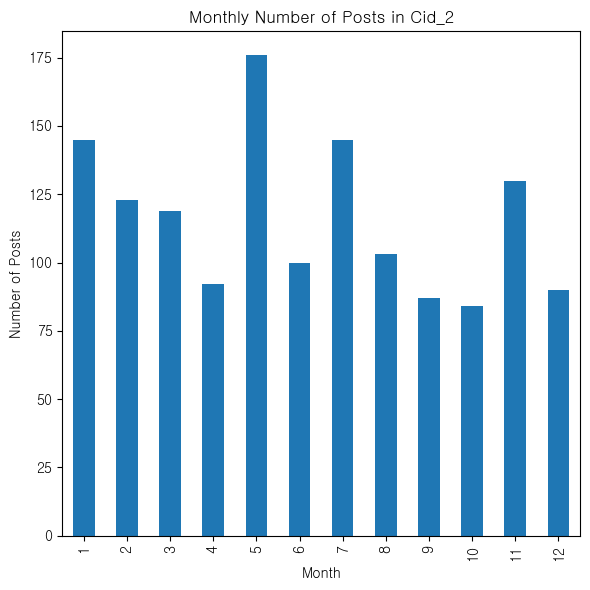

In [113]:
plot_monthly_posts(df_Cid_2, 2)


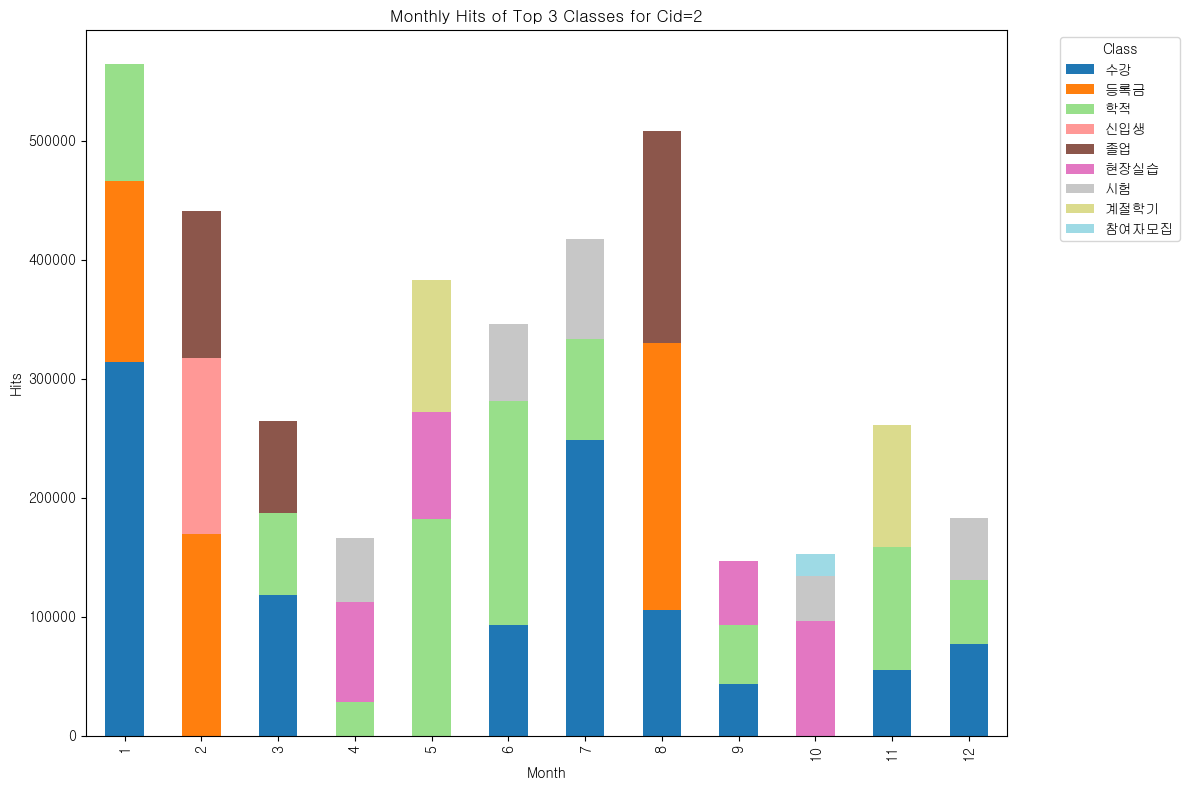

In [114]:
plot_monthly_hits(df_Cid_2, 2)


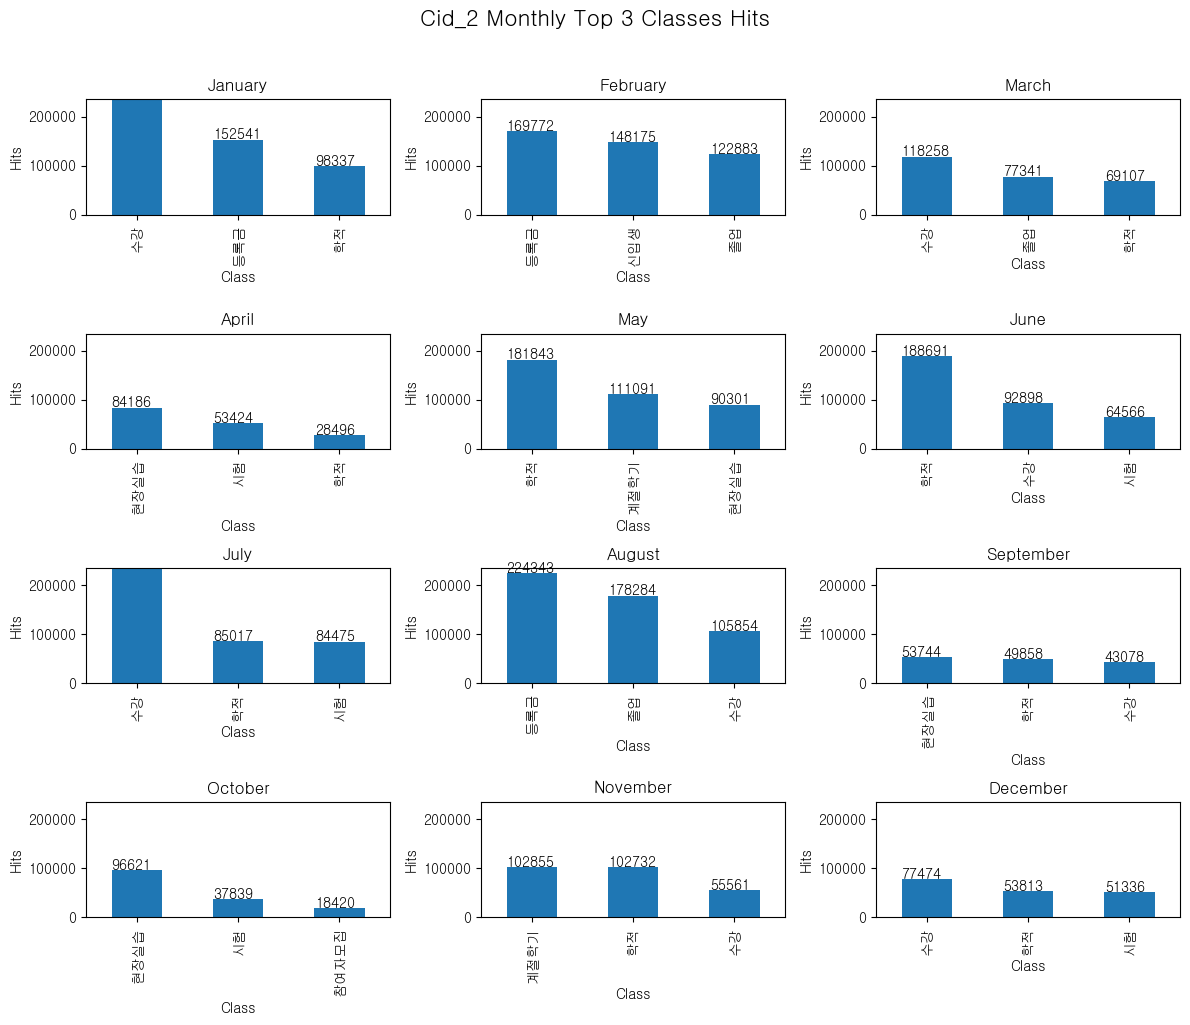

In [115]:
plot_monthly_top_classes(df, cid=2, nor=5,num_classes=3, figsize=(12, 10))


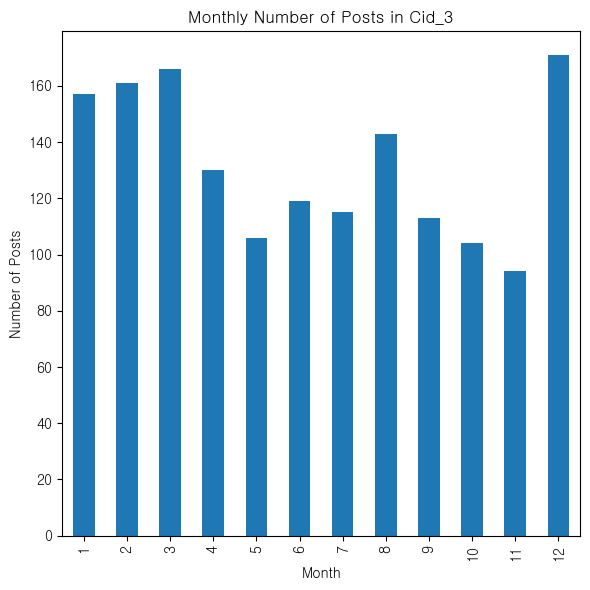

In [116]:
plot_monthly_posts(df_Cid_3, 3)


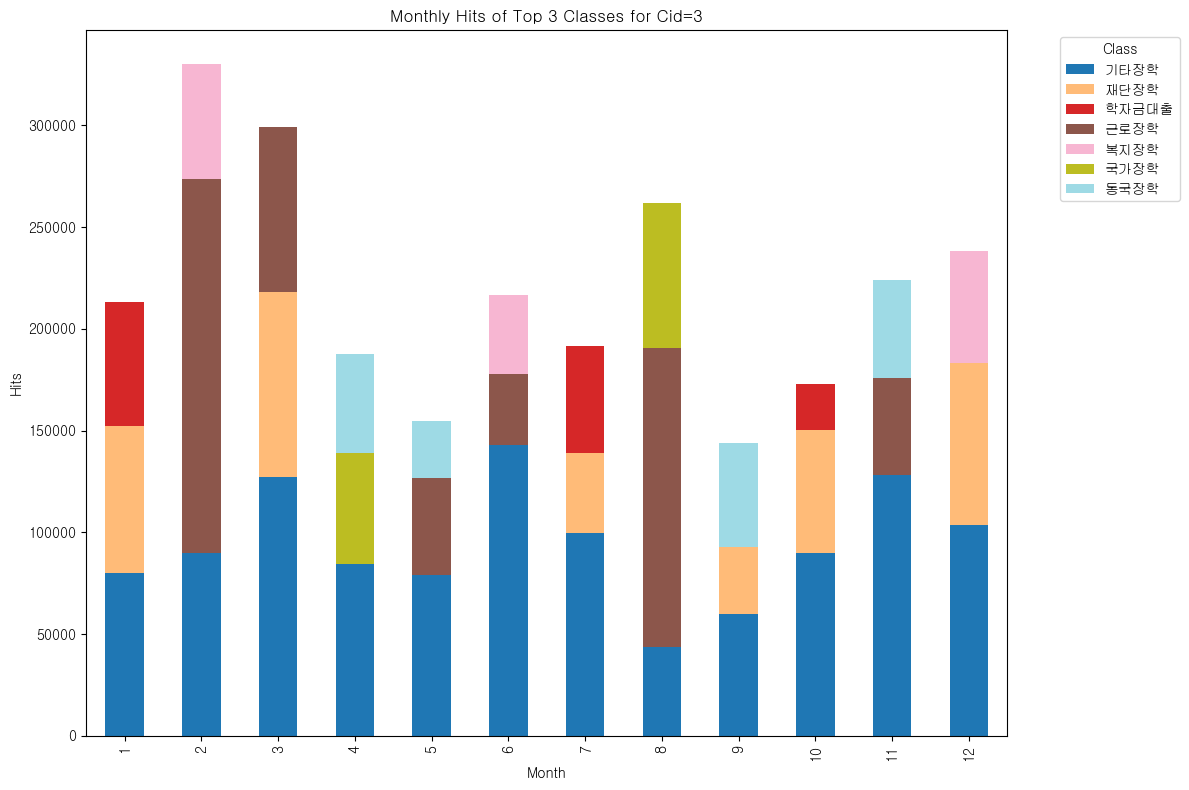

In [117]:
plot_monthly_hits(df_Cid_3, 3)


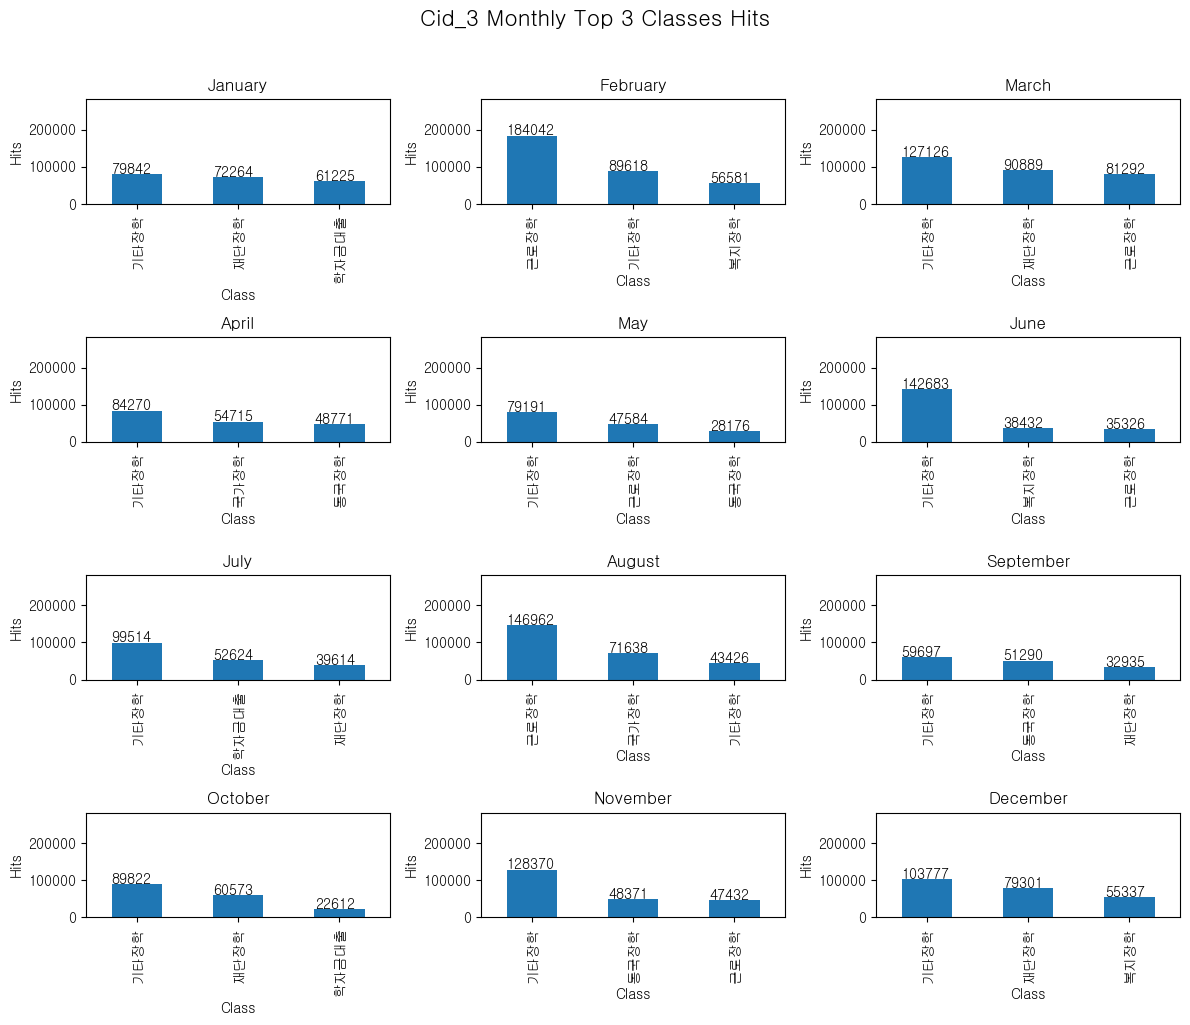

In [118]:
plot_monthly_top_classes(df, cid=3, nor=4,num_classes=3, figsize=(12, 10))



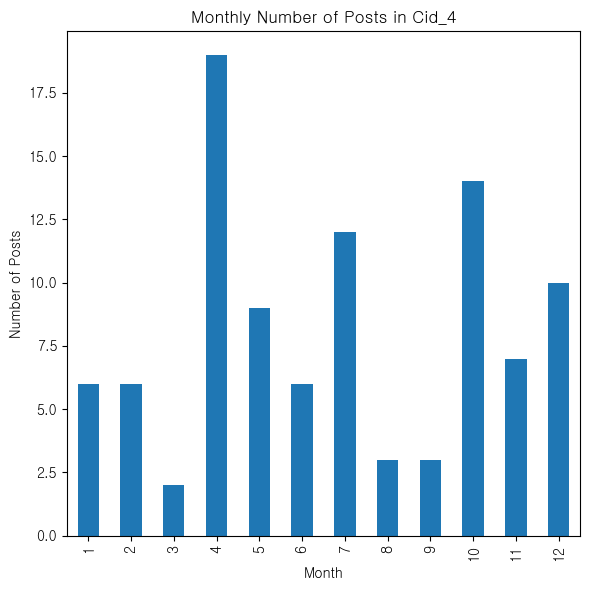

In [119]:
plot_monthly_posts(df_Cid_4, 4)


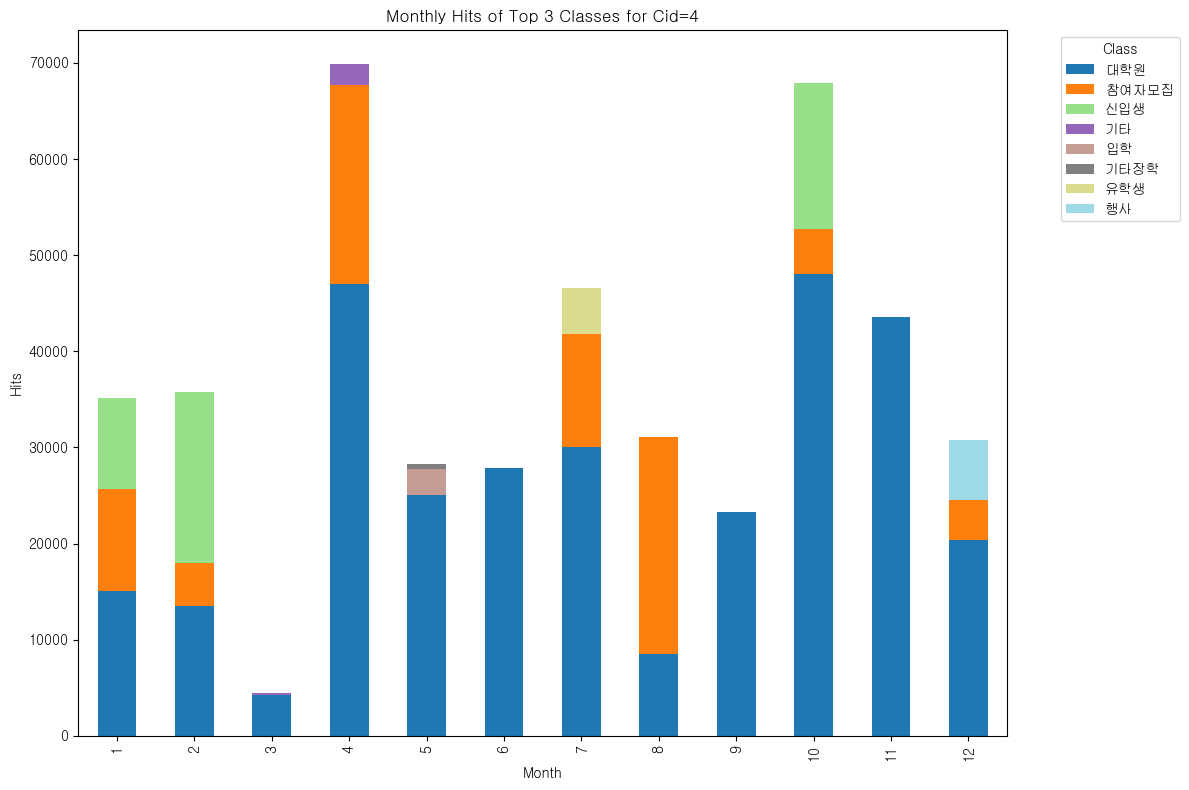

In [120]:
plot_monthly_hits(df_Cid_4, 4)


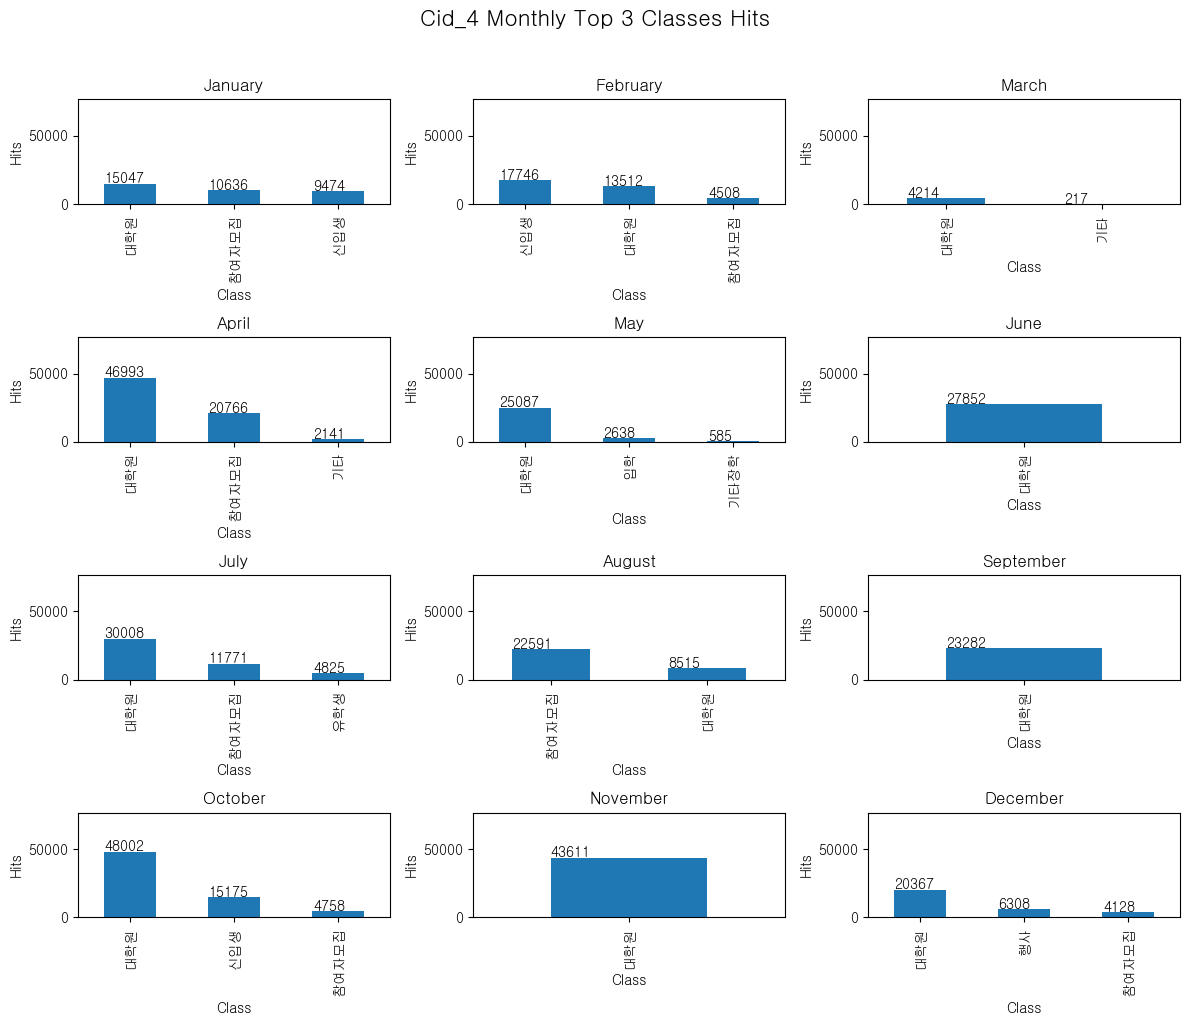

In [121]:
plot_monthly_top_classes(df, cid=4, nor=4,num_classes=3, figsize=(12, 10))



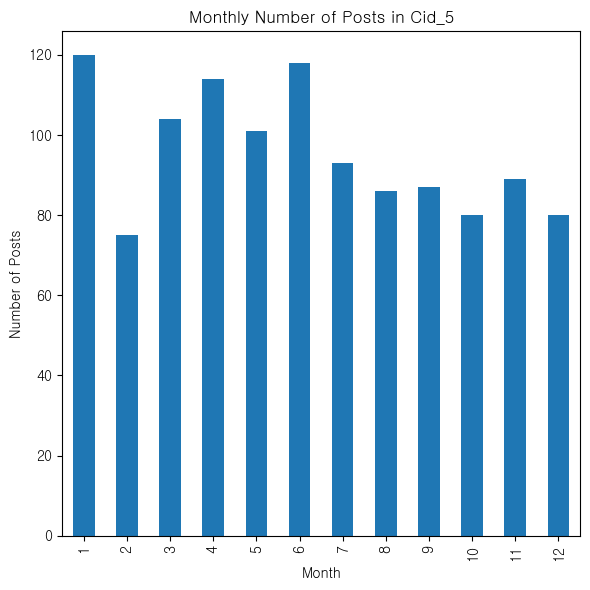

In [122]:
plot_monthly_posts(df_Cid_5, 5)


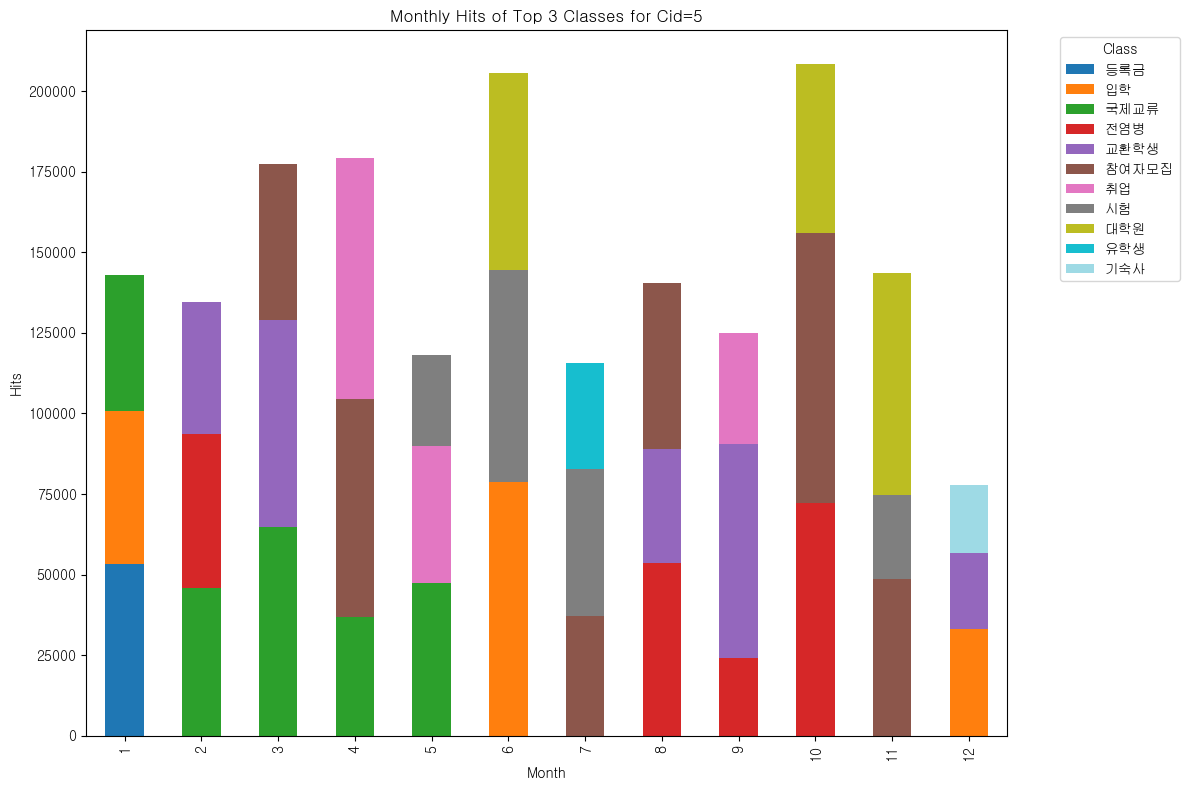

In [123]:
plot_monthly_hits(df_Cid_5, 5)


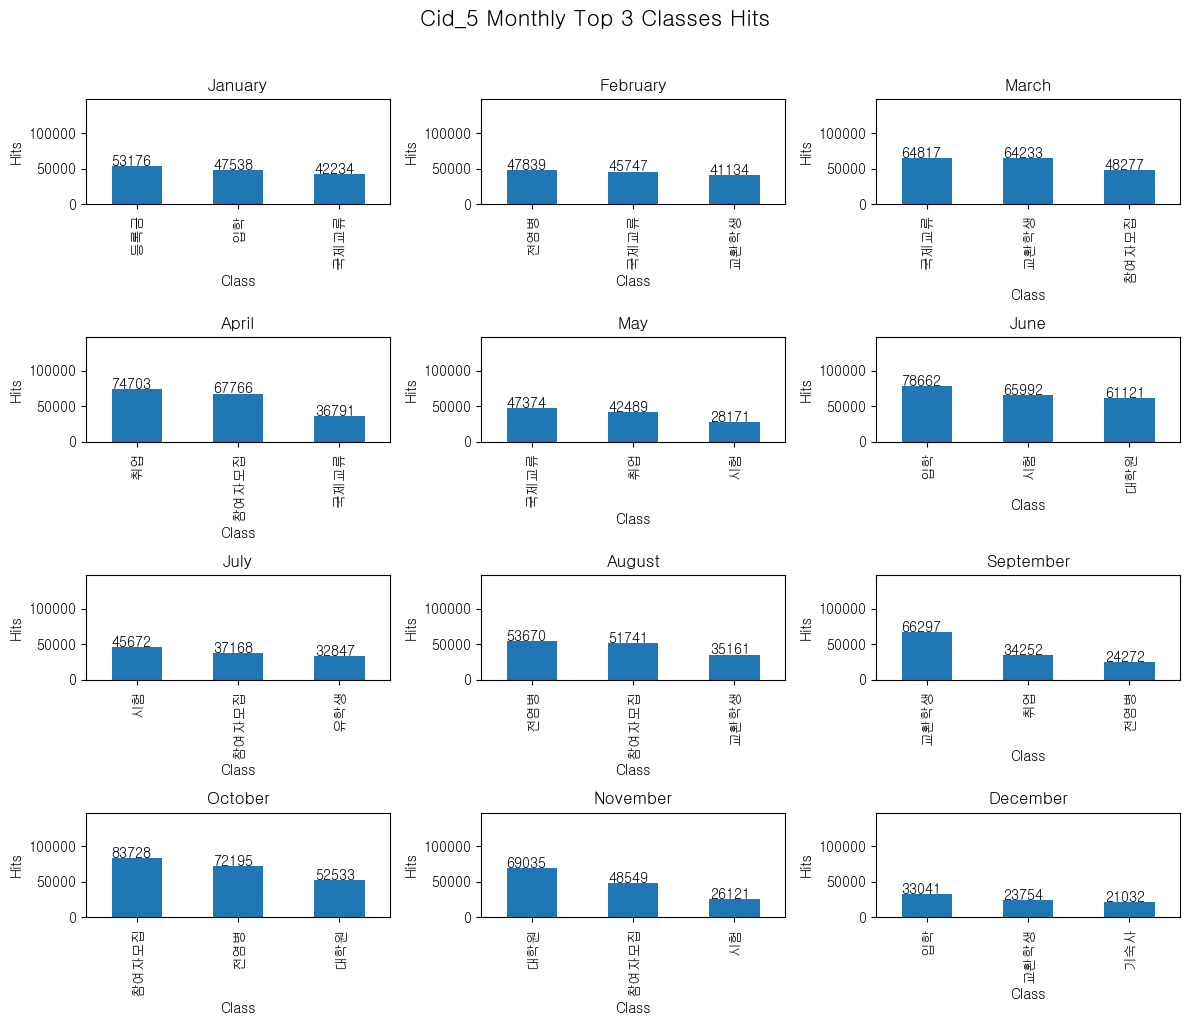

In [124]:
plot_monthly_top_classes(df, cid=5, nor=3,num_classes=3, figsize=(12, 10))



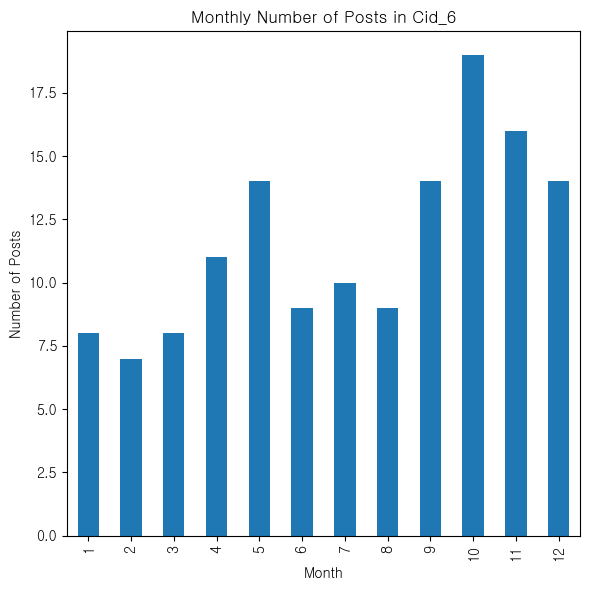

In [125]:
plot_monthly_posts(df_Cid_6, 6)


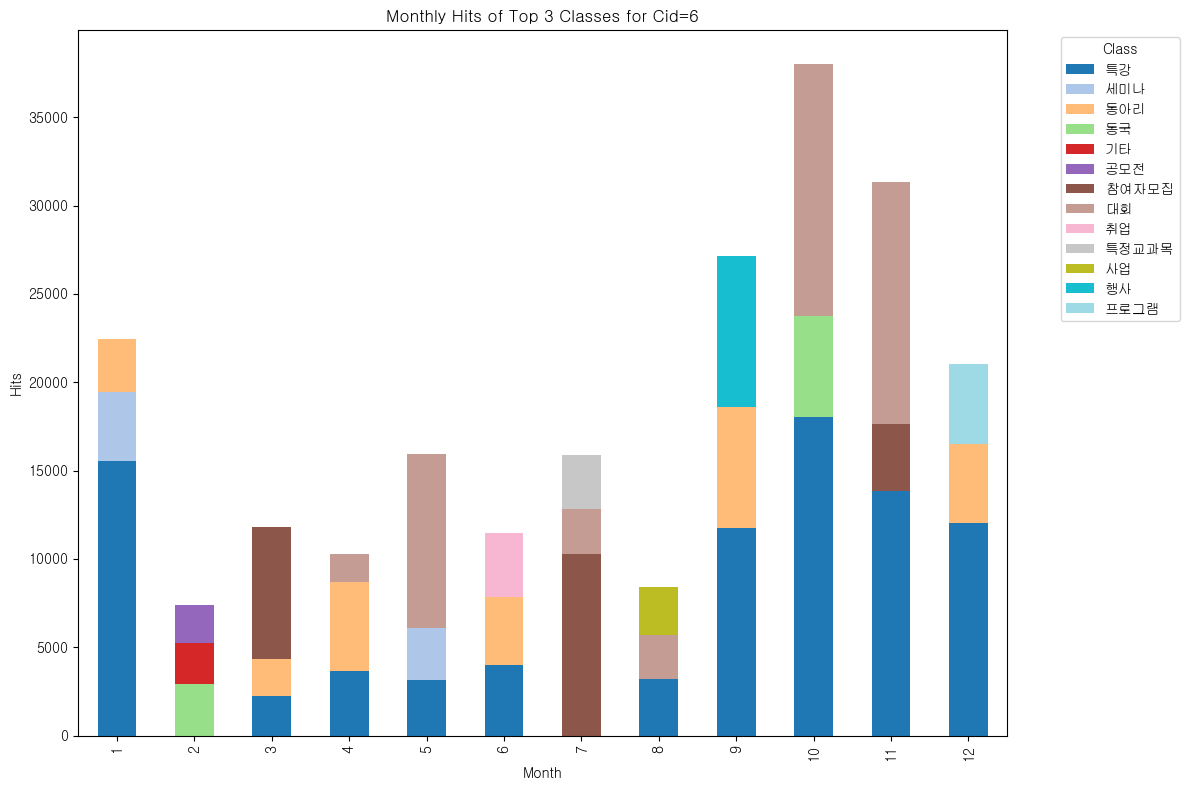

In [126]:
plot_monthly_hits(df_Cid_6, 6)


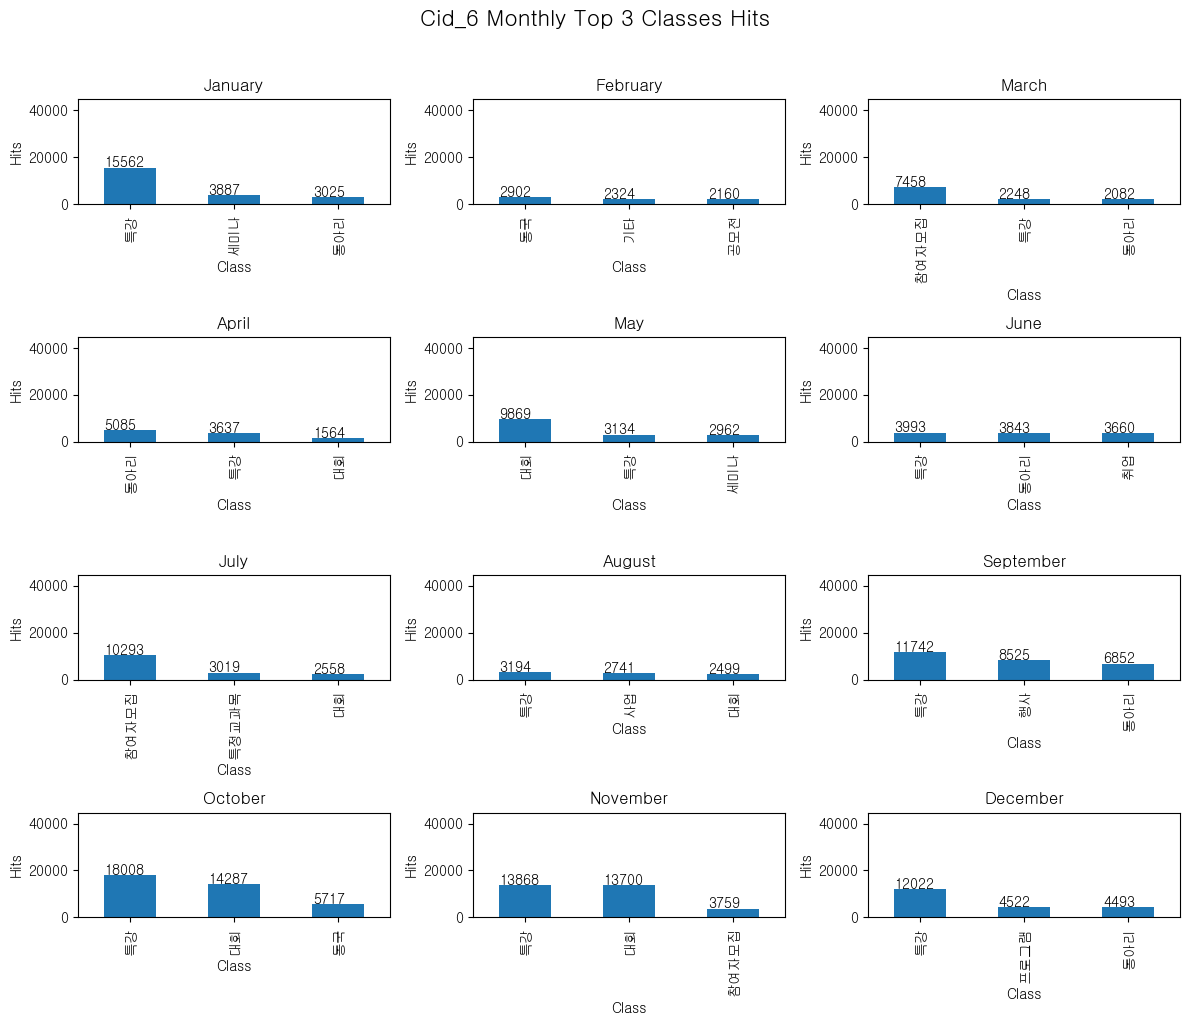

In [127]:
plot_monthly_top_classes(df, cid=6, nor=2,num_classes=3, figsize=(12, 10))


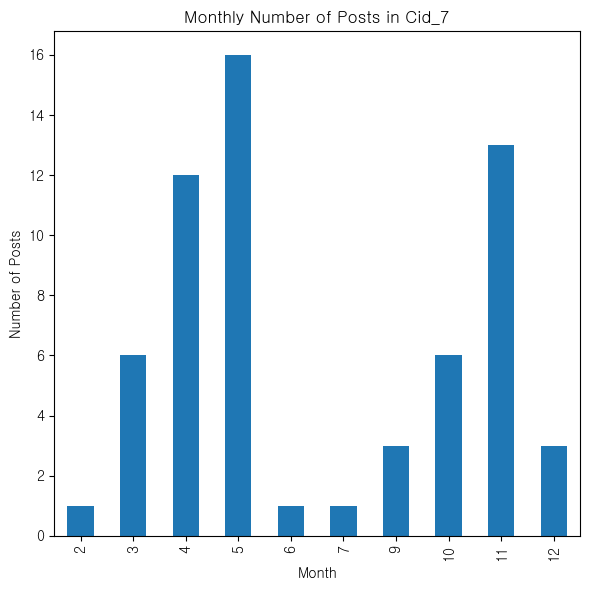

In [128]:
plot_monthly_posts(df_Cid_7, 7)


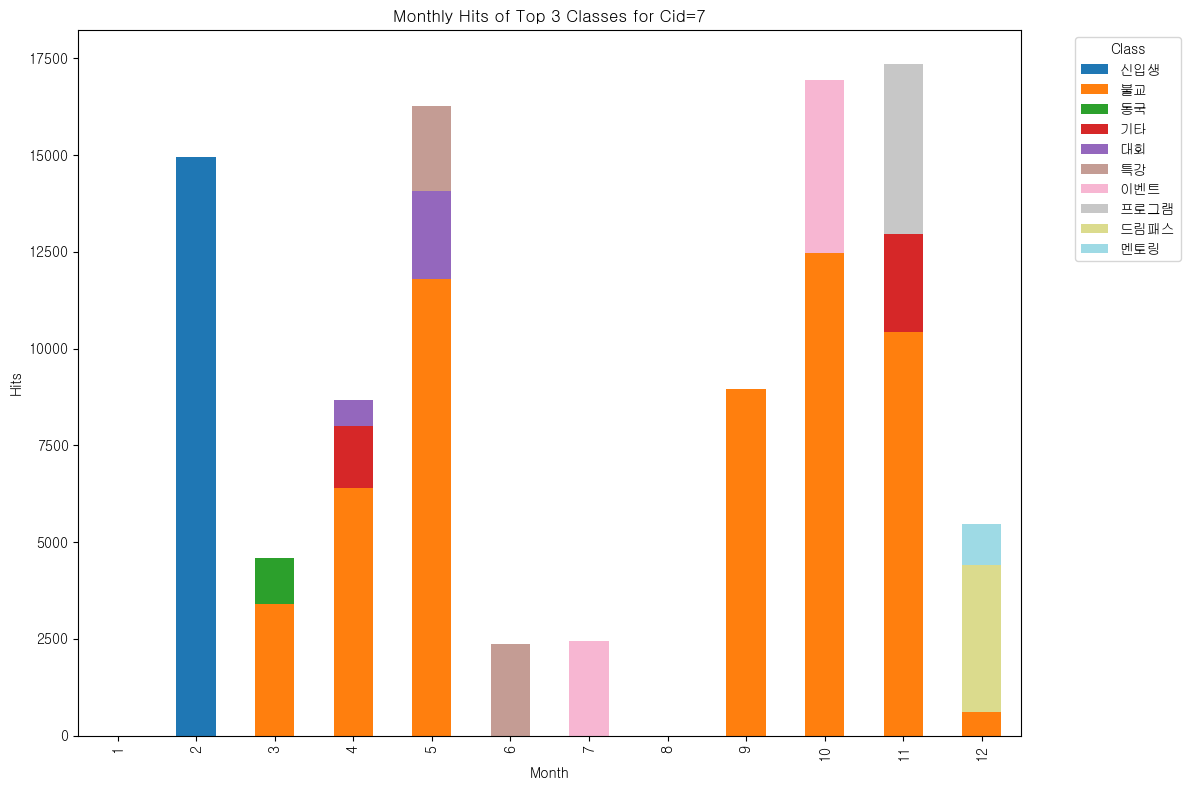

In [129]:
plot_monthly_hits(df_Cid_7, 7)


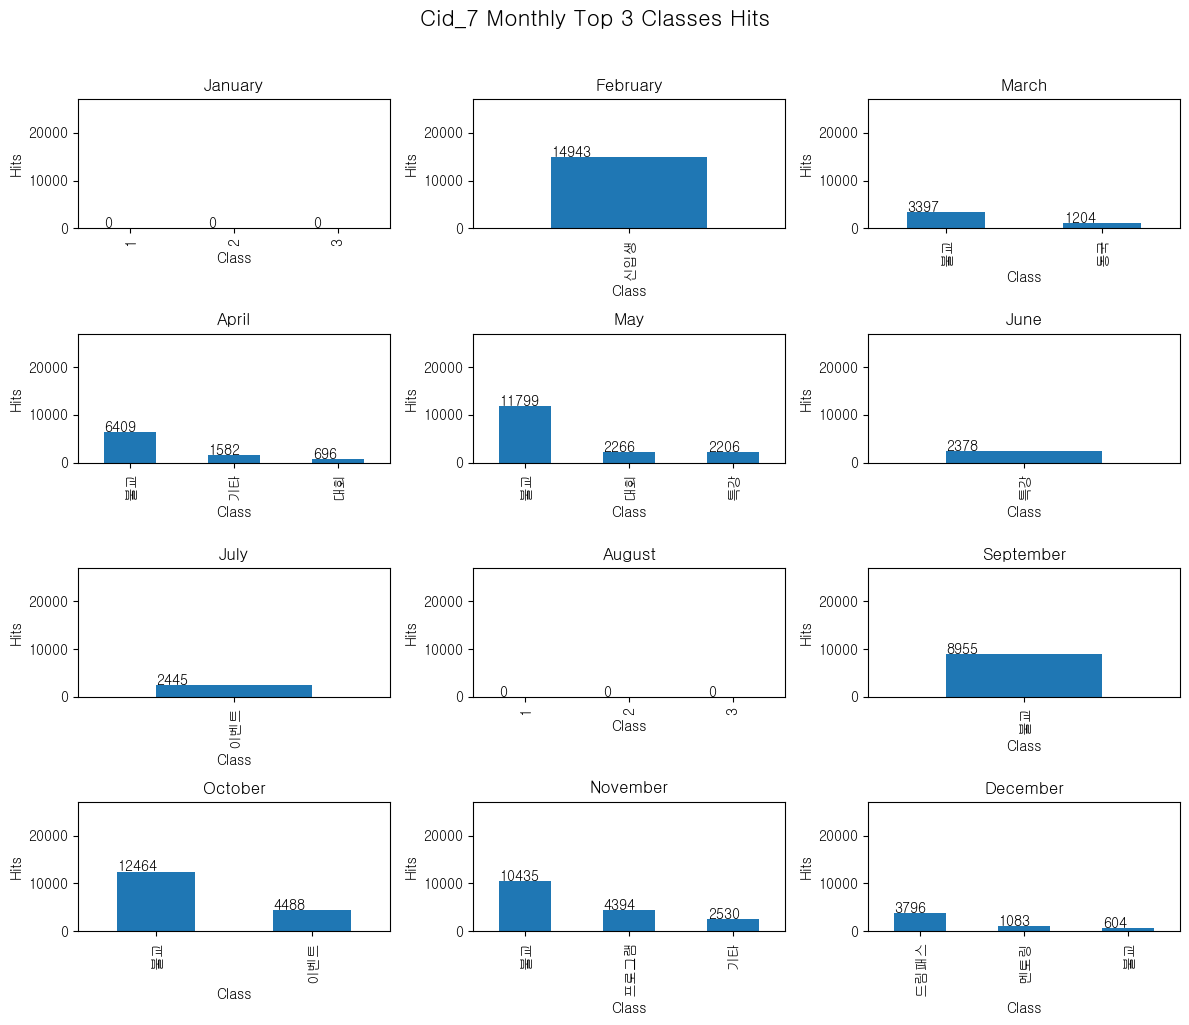

In [130]:
plot_monthly_top_classes(df, cid=7, nor=2,num_classes=3, figsize=(12, 10))


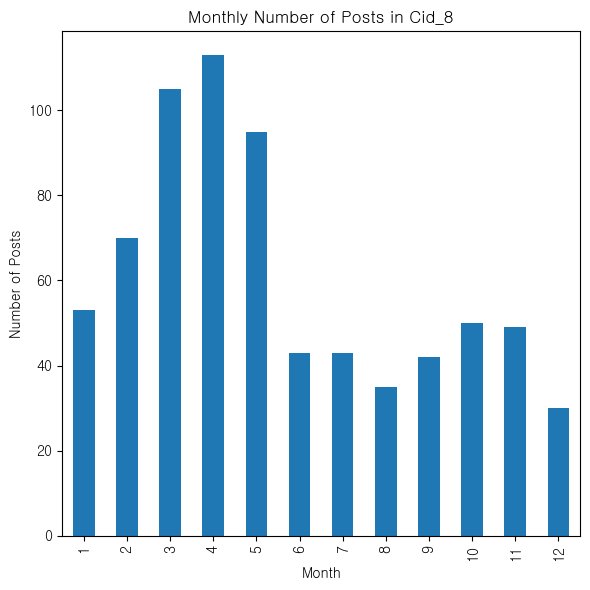

In [131]:
plot_monthly_posts(df_Cid_8, 8)


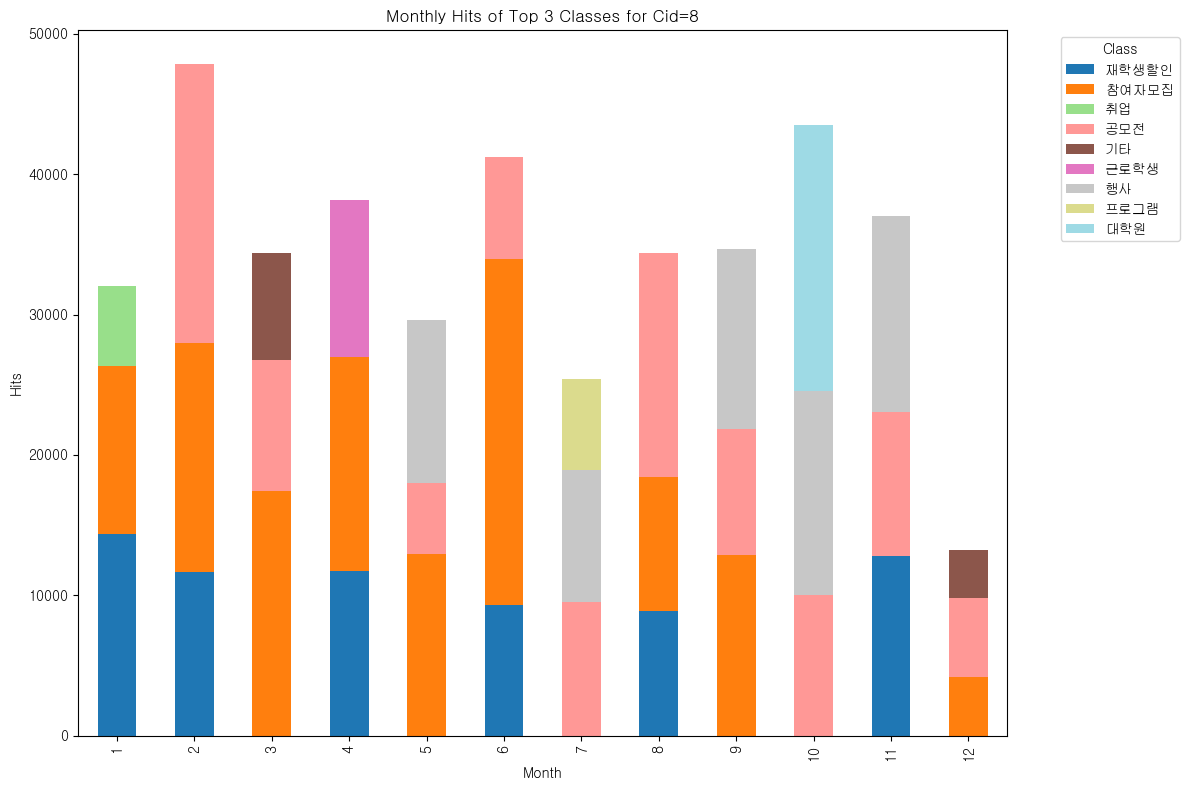

In [132]:
plot_monthly_hits(df_Cid_8, 8)

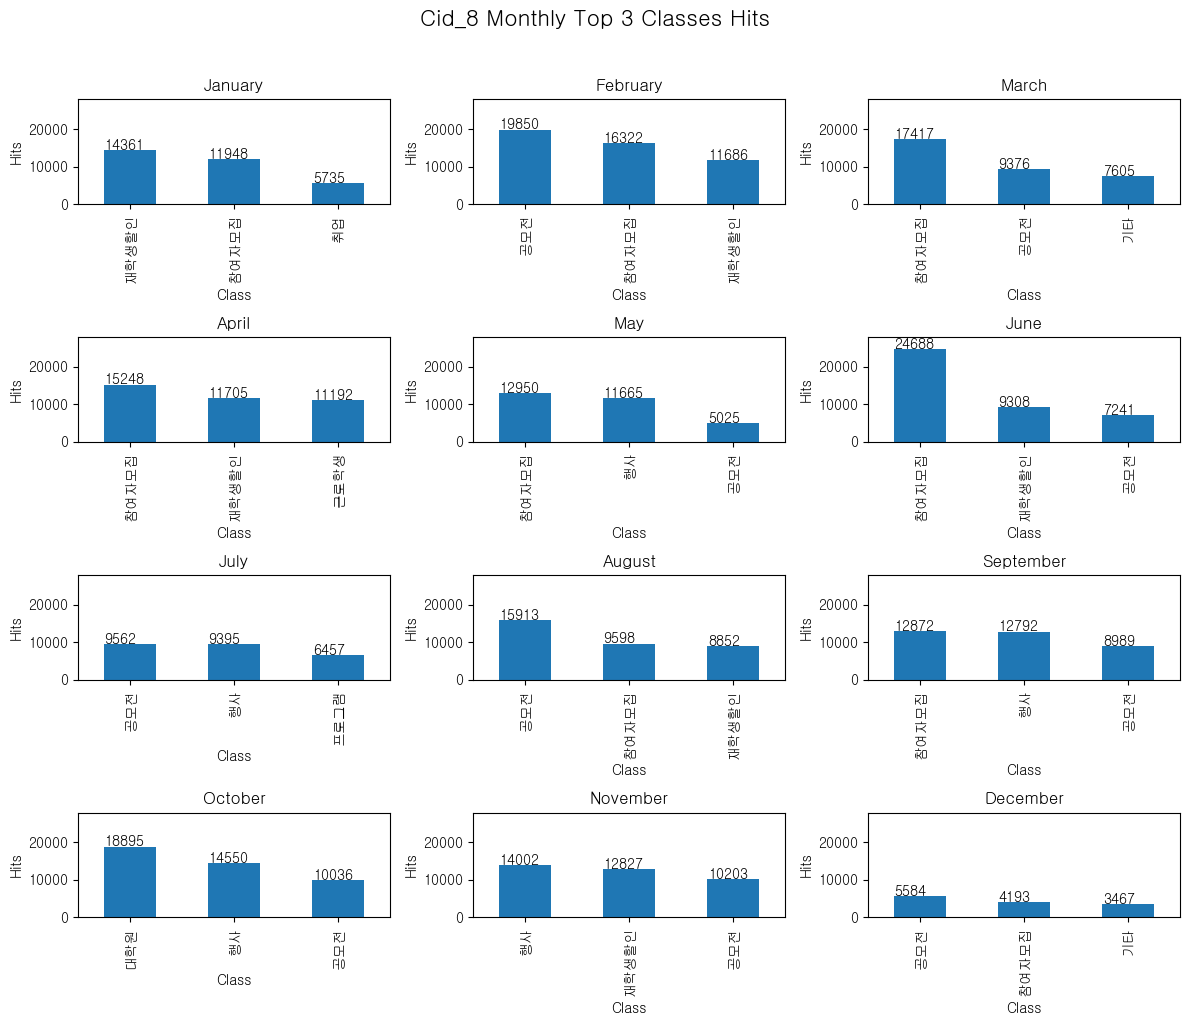

In [133]:
plot_monthly_top_classes(df, cid=8, nor=5,num_classes=3, figsize=(12, 10))


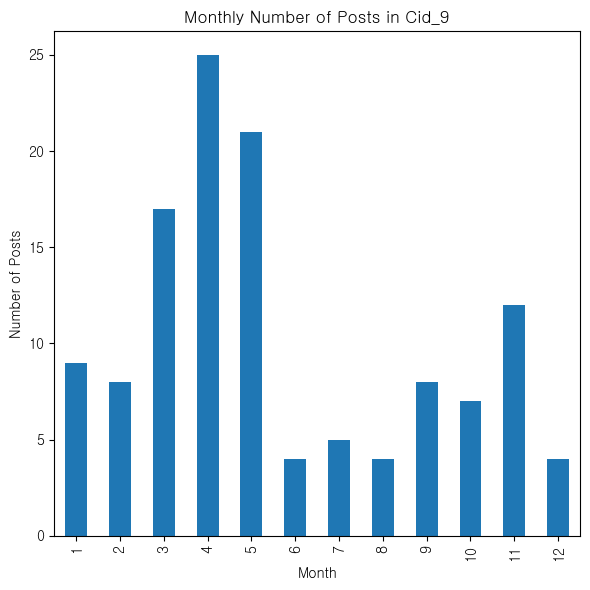

In [134]:
plot_monthly_posts(df_Cid_9, 9)


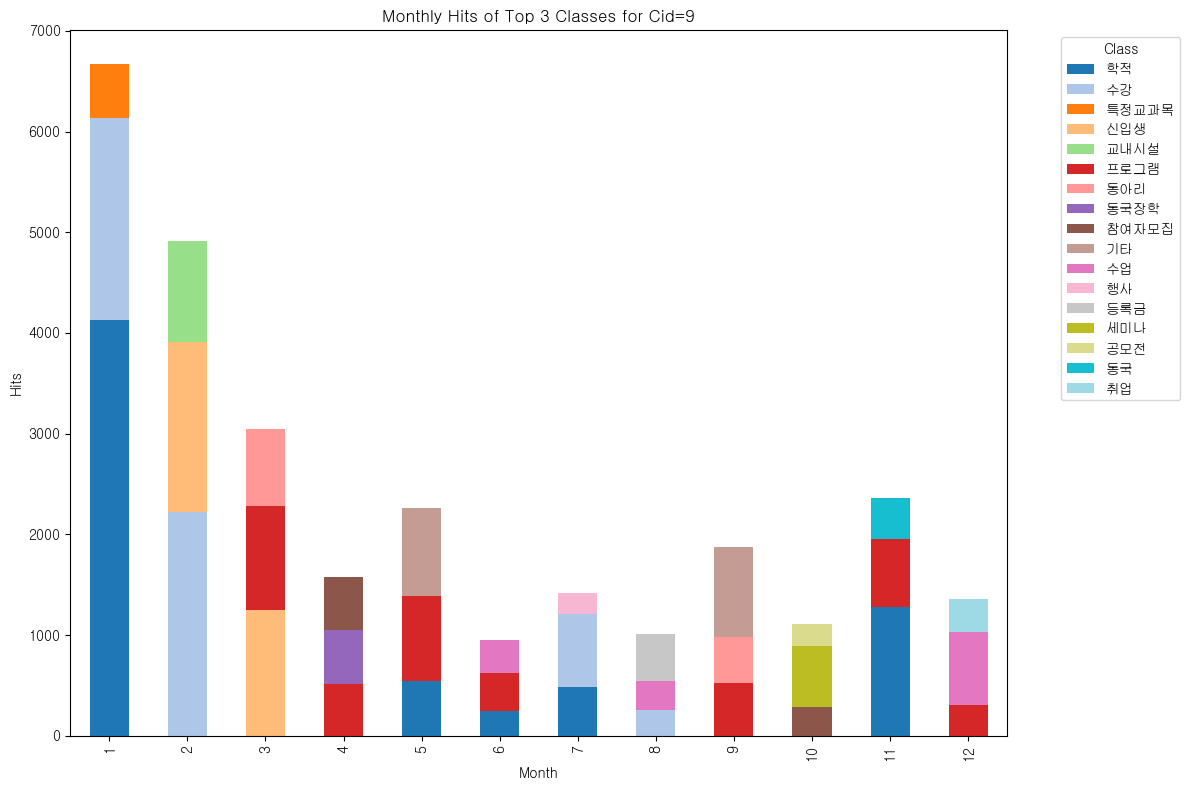

In [135]:
plot_monthly_hits(df_Cid_9, 9)



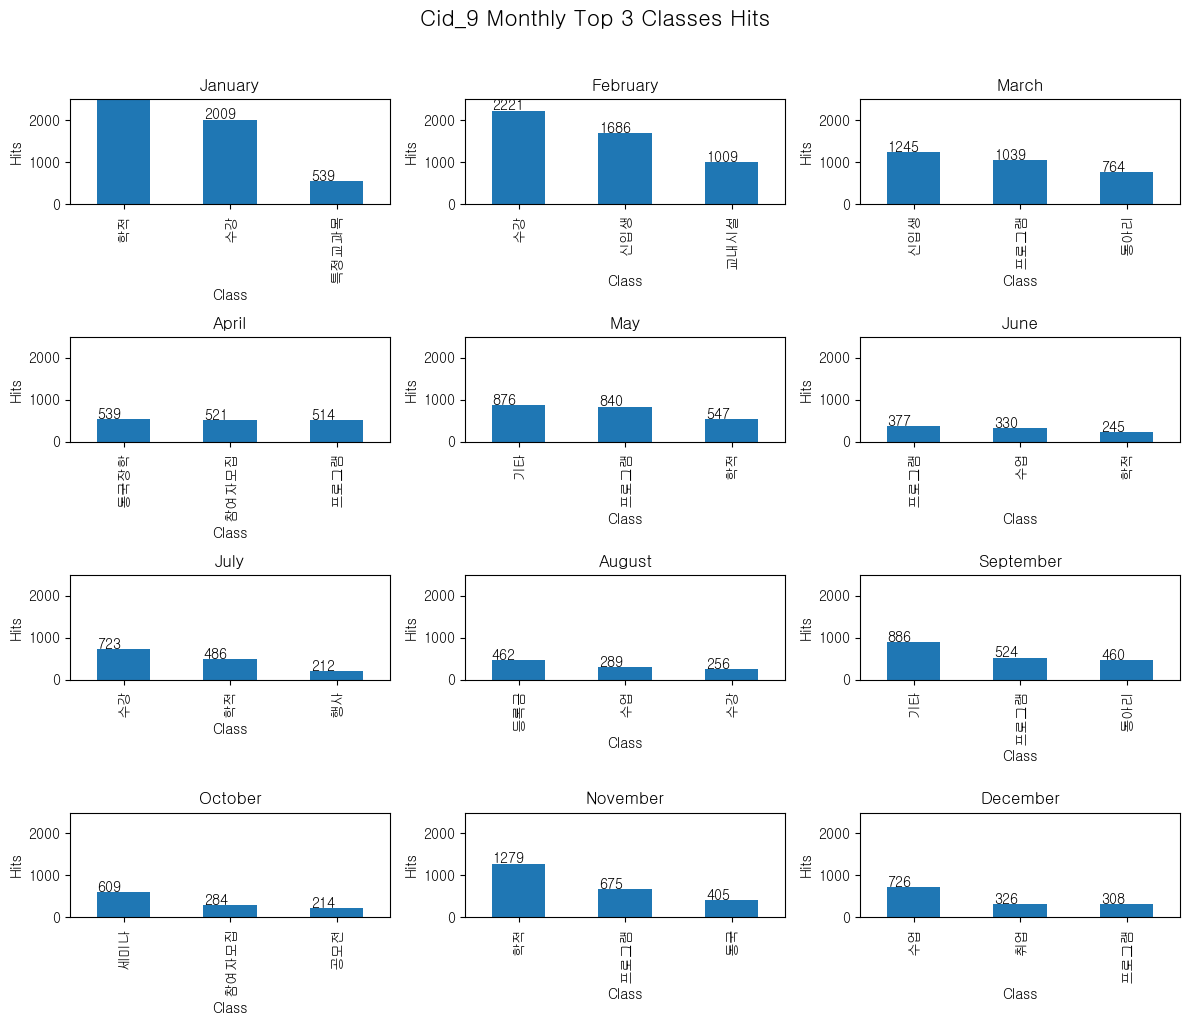

In [136]:
plot_monthly_top_classes(df, cid=9, nor=3,num_classes=3, figsize=(12, 10))


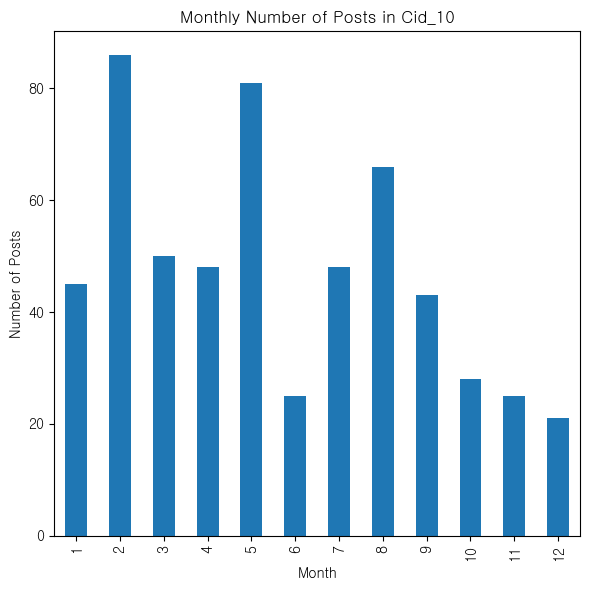

In [137]:
plot_monthly_posts(df_Cid_10, 10)


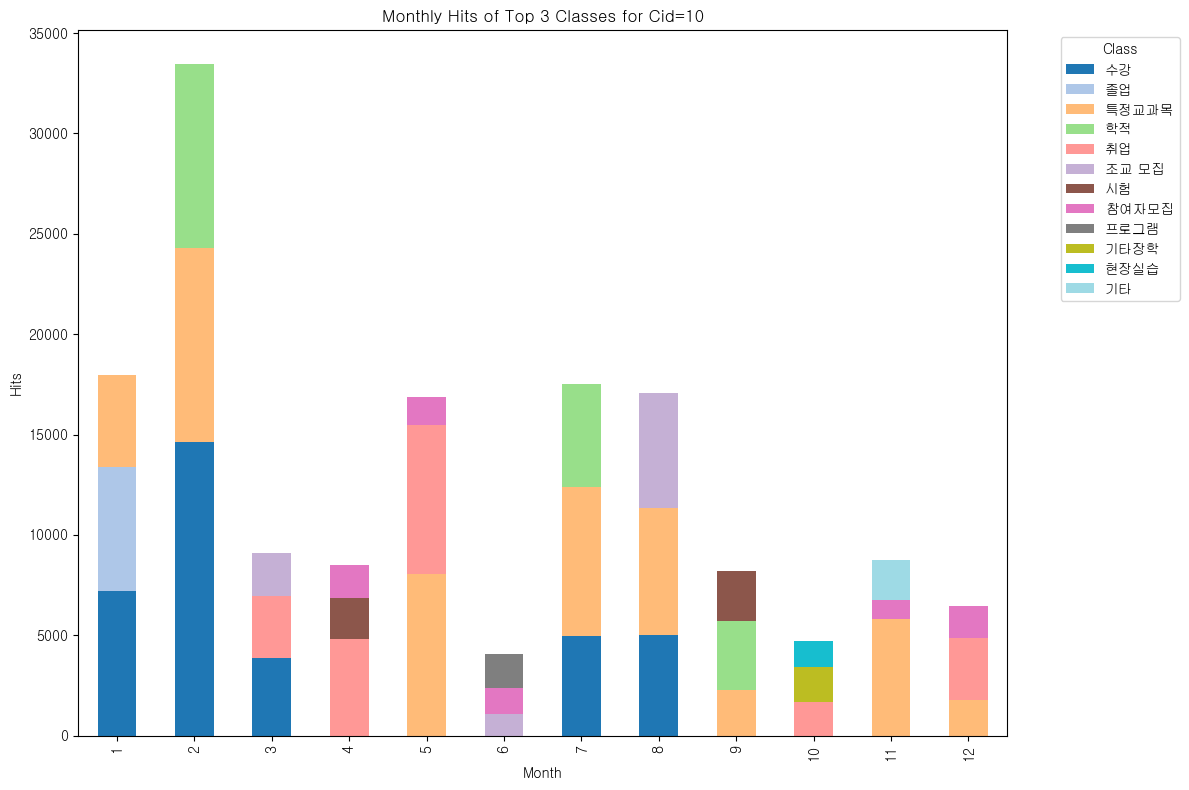

In [138]:
plot_monthly_hits(df_Cid_10, 10)


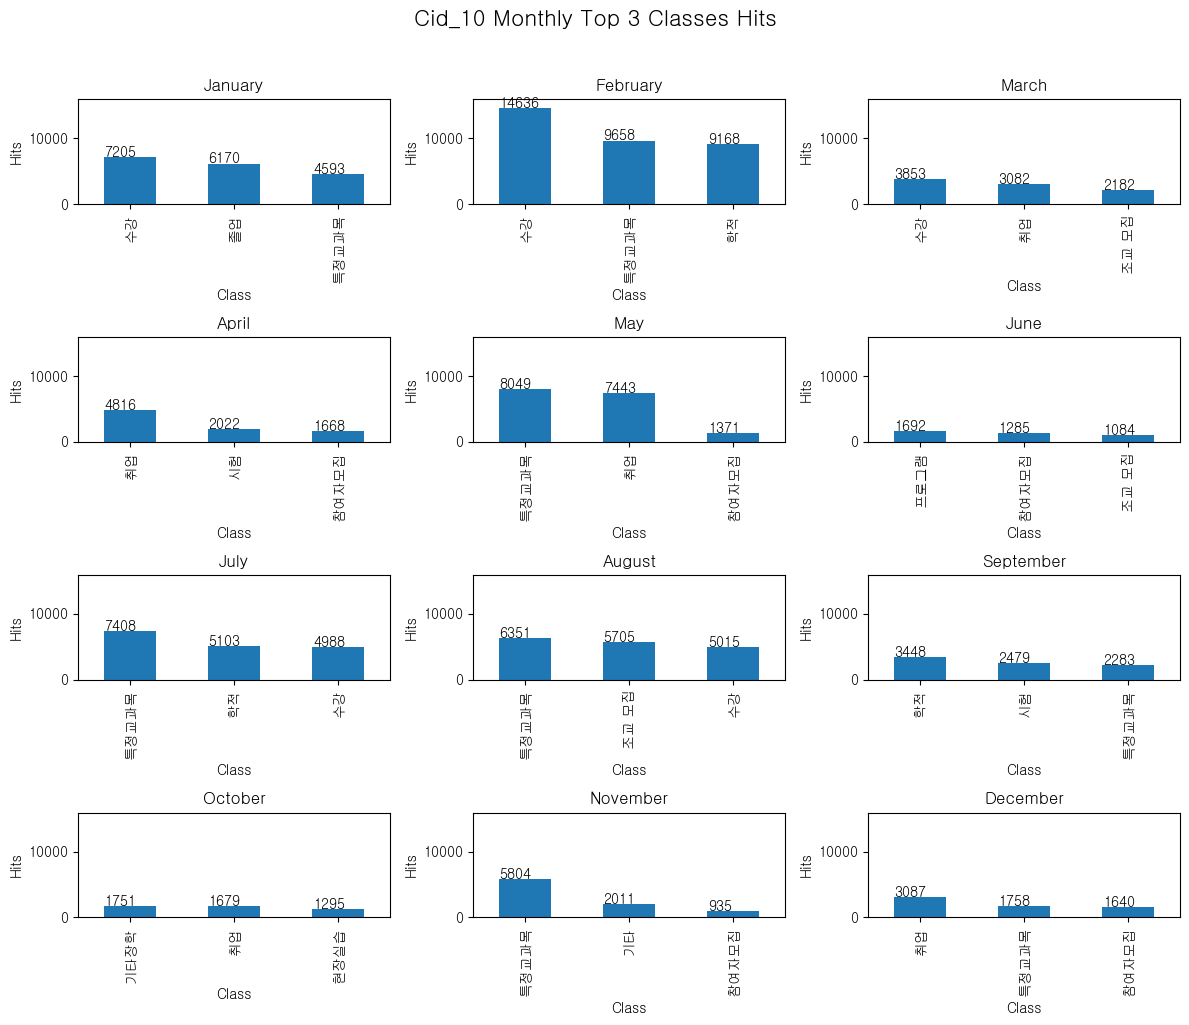

In [139]:
plot_monthly_top_classes(df, cid=10, nor=3,num_classes=3, figsize=(12, 10))


In [143]:
#df에서 class 종류 확인
df['class'].unique()
# 갯수
# df['class'].nunique()

68